In [1]:
library(ggplot2)
library(gridExtra)
library(cowplot)
library(ggstatsplot)
library(ggside)
library(dplyr)
library(summarytools)
library(ggfortify)
library(plyr)
library(purrr)
library(hash)
library(scales)
library(ggridges)
library(tidyr)
library(patchwork)
library(stringr)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system2("/usr/bin/otool", c("-L", shQuote(DSO)), stdout = TRUE):
“running command ''/usr/bin/otool' -L '/Users/suzheng/opt/anaconda3/envs/r4new/lib/R/library/tcltk/libs//tcltk.so'' had status 1”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this

In [2]:
Sys.setenv(psi_fig_tables_RData_dir="/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/fig_tables/RData")

In [3]:
setwd(Sys.getenv("psi_fig_tables_RData_dir"))


col_sz <- c('#00A1D5FF','#6A6599FF','#DF8F44FF','#B24745FF','#80796BFF','#79AF97FF','#374E55FF')
first_col_idx <- 1
base_width <- 3.5
base_font_size <- 7
size_rel1 <- 1.15
size_rel3 <- 1.2
subfigure_label_size_val <- 9
age_group_label <- "Age group"
cohort_label <- "Cohort"
gender_label <- "Gender"
source("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/visualize4paper/shared/shared.R")



theme_Publication <- function(base_size=base_font_size, base_family="Helvetica") {

      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(size_rel3), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(size = rel(size_rel1)),  # Increased size for axis title
               axis.title.y = element_text(angle=90,vjust =2, size = rel(size_rel1)),  # Increased size for y-axis title
               axis.title.x = element_text(vjust = -0.2, size = rel(size_rel1)),  # Increased size for x-axis title
               axis.text = element_text(size = rel(size_rel3)),  # Increased size for axis text (labels)
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "top",
               legend.direction = "horizontal",
               legend.key.size= unit(rel(size_rel1), "npc"),
               legend.margin = margin(t = 0, unit='cm'),
               legend.title = element_text(face="italic", size = rel(size_rel1)),
               plot.margin=unit(c(4,4,4,4),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
}


# panel.grid.major = element_line(colour="#f0f0f0"),
theme_and_color_Publication <- function(col_sz=col_sz) {  
  list(
    theme_Publication(),
    scale_color_manual(values = col_sz),
    scale_fill_manual(values = col_sz)
  )
}

add_subfigure_label <- function(p, subfigure_label, subfigure_label_size=subfigure_label_size_val){
    cowplot::ggdraw(p) + 
      cowplot::draw_label(label = subfigure_label, x = 0, y = 1, hjust = 0, vjust = 1, size = subfigure_label_size, fontface = "bold")
}


Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map



Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate


The following object is masked from ‘package:cowplot’:

    get_legend




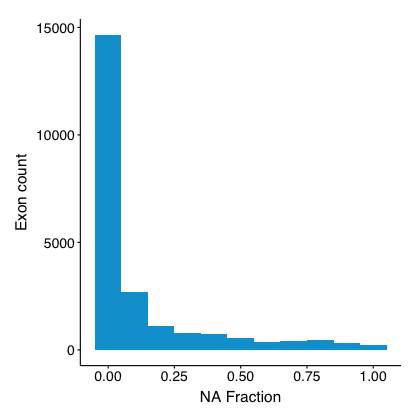

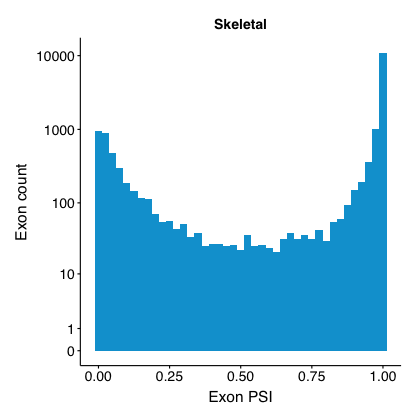

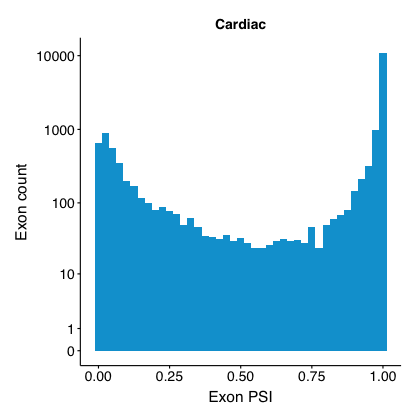

In [13]:


load("psi_NA_Fraction_by_gene.RData")
options(repr.plot.width=base_width, repr.plot.height=base_width)
psi_NA_Fraction_by_gene <- psi_NA_Fraction_by_gene + 
  geom_histogram(binwidth=0.1, fill=col_sz[first_col_idx]) +
  labs(x='NA Fraction', y='Exon count') + 
  theme_Publication()

print(psi_NA_Fraction_by_gene)

add_one_trans <- function(x) log10(x + 1)
add_one_trans_obj <- scales::trans_new("add_one_trans", transform = add_one_trans, inverse = function(x) 10^x - 1)
hist_y_breaks <- c(0, 1, 10, 100, 1000, 10000)
                                       
load("skeletal_all_exon_psi_g.RData")
options(repr.plot.width=base_width, repr.plot.height=base_width)
skeletal_all_exon_psi_g <- skeletal_all_exon_psi_g + 
  geom_histogram(binwidth = 0.025, fill=col_sz[first_col_idx]) +
  scale_y_continuous(trans = add_one_trans_obj,
                    breaks = hist_y_breaks, # custom breaks
                     labels = hist_y_breaks) +
  labs(title = "Skeletal", x = "Exon PSI", y = "Exon count") +
  theme_Publication()
print(skeletal_all_exon_psi_g)

load("cardiac_all_exon_psi_g.RData")
options(repr.plot.width=base_width, repr.plot.height=base_width)
cardiac_all_exon_psi_g <- cardiac_all_exon_psi_g + 
  geom_histogram(binwidth = 0.025, fill=col_sz[first_col_idx]) +
  scale_y_continuous(trans = add_one_trans_obj,
                    breaks = hist_y_breaks, # custom breaks
                     labels = hist_y_breaks) +
  labs(title = "Cardiac", x = "Exon PSI", y = "Exon count") +
  theme_Publication()
print(cardiac_all_exon_psi_g)


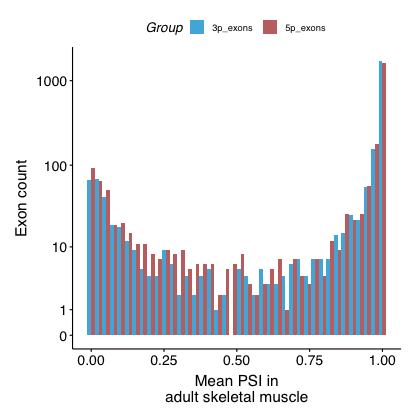

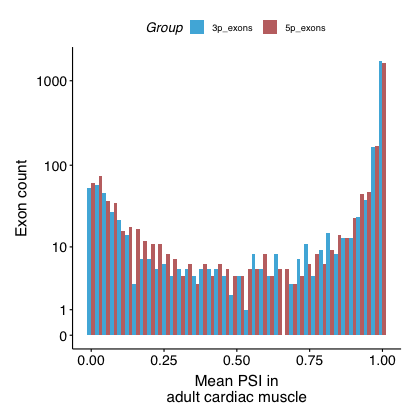

In [14]:
alpha_53p <- 0.8
cols_53p <- col_sz[c(1,4)]

load("exon_two_ends_g_skeletal.RData")
options(repr.plot.width=base_width, repr.plot.height=base_width)
skeletal_exon_two_ends_g <- exon_two_ends_g  + 
  geom_histogram(alpha = alpha_53p, position = "dodge", bins = 40) +
 scale_fill_manual(values = cols_53p) +scale_y_continuous(trans = add_one_trans_obj,
                    breaks = hist_y_breaks, # custom breaks
                     labels = hist_y_breaks)  + theme_Publication() + 
 theme(legend.key.size= unit(0.35, "cm")) +
 labs(x="Mean PSI in\nadult skeletal muscle", y="Exon count", fill="Group")
print(skeletal_exon_two_ends_g)

load("exon_two_ends_g_cardiac.RData")
options(repr.plot.width=base_width, repr.plot.height=base_width)
cardiac_exon_two_ends_g <- exon_two_ends_g  + 
  geom_histogram(alpha = alpha_53p, position = "dodge", bins = 40) +
 scale_fill_manual(values = cols_53p) +scale_y_continuous(trans = add_one_trans_obj,
                    breaks = hist_y_breaks, # custom breaks
                     labels = hist_y_breaks)  + theme_Publication() + 
 theme(legend.key.size= unit(0.35, "cm")) +
 labs(x="Mean PSI in\nadult cardiac muscle", y="Exon count", fill="Group")
print(cardiac_exon_two_ends_g)

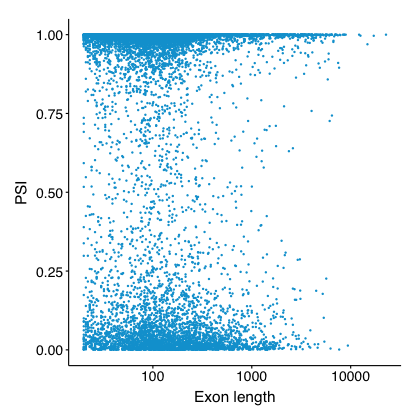

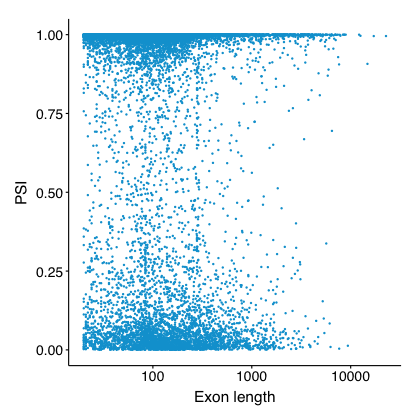

In [15]:
x_breaks <- c(10, 100, 1000, 10000)
load("exon_len_psi_cor_g_skeletal.RData")
exon_len_psi_cor_g_skeletal <- exon_len_psi_cor_g+ 
  geom_point(color=col_sz[first_col_idx], size=0.01)  +
  labs(x = "Exon length", y = "PSI") +
  coord_trans(x = "log10") +
  scale_x_continuous(breaks = x_breaks) + 
  labs(title ="corr between exon length and psi") + 
  labs(title = NULL) +
  theme_Publication()
print(exon_len_psi_cor_g_skeletal)

load("exon_len_psi_cor_g_cardiac.RData")
exon_len_psi_cor_g_cardiac <- exon_len_psi_cor_g+ 
  geom_point(color=col_sz[first_col_idx], size=0.01)  +
  labs(x = "Exon length", y = "PSI") +
  coord_trans(x = "log10") +
  scale_x_continuous(breaks = x_breaks) + 
  labs(title ="corr between exon length and psi") + 
  labs(title = NULL) +
  theme_Publication()
print(exon_len_psi_cor_g_cardiac)


Warning message:
“Removed 760733 rows containing non-finite values (stat_bin).”


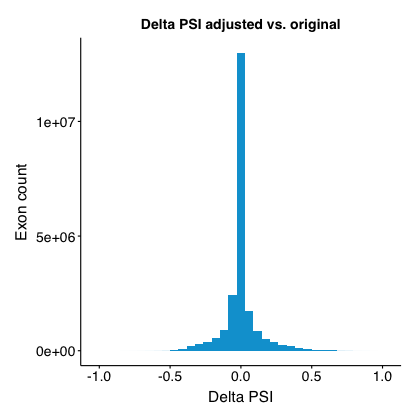

In [16]:
load("Delta_PSI_adjusted_vs_original.RData")

Delta_PSI_adjusted_vs_original <- Delta_PSI_adjusted_vs_original +
   geom_histogram(bins=35, fill=col_sz[first_col_idx]) +
   labs(title = "Delta PSI adjusted vs. original", x = "Delta PSI", y = "Exon count")+
    theme_Publication()
print(Delta_PSI_adjusted_vs_original)

In [17]:
pca_plot_theme <- function(){
        theme_Publication() + 
    theme(legend.key.size= unit(0.35, "cm"), 
          legend.position = "right",
               legend.direction = "vertical",
          legend.text = element_text(size = base_font_size * 1.1)
         ) 
}


In [18]:
calculate_r_squared <- function(plot) {
  plot_data <- ggplot2::ggplot_build(plot)$data[[1]]
  x_values <- plot_data$x
  y_values <- plot_data$y
  r_squared <- cor(x_values, y_values, use = "complete.obs")^2
  return(r_squared)
}



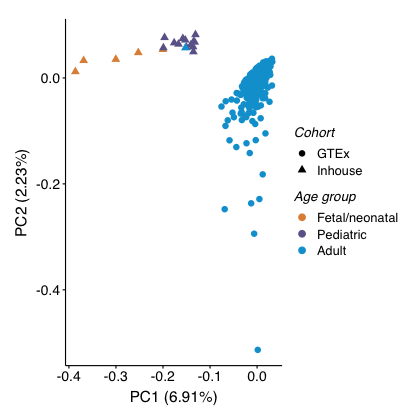

[1] "R-squared: 0.918"


`geom_smooth()` using formula 'y ~ x'



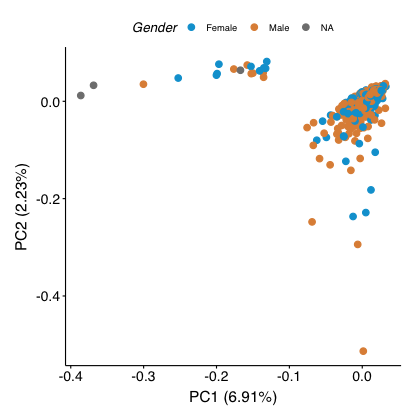

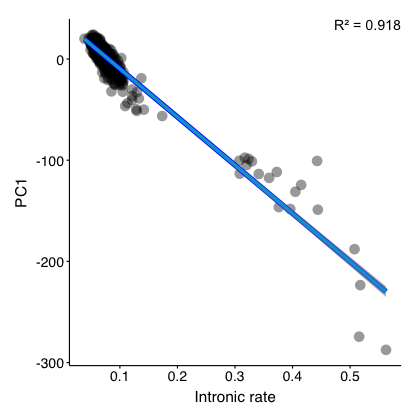

In [27]:
load("ori_data.TRUE.skeletal_muscle.RData")

options(repr.plot.width=base_width, repr.plot.height=base_width)

ori_data.TRUE.skeletal_muscle_age_group <- plots[["ori_data.TRUE.skeletal_muscle_age_group"]] + 
    pca_plot_theme() + 
    labs(colour = age_group_label, shape = cohort_label) +
    scale_color_manual(values = col_sz[3:1]) 
print(ori_data.TRUE.skeletal_muscle_age_group) 

ori_data.TRUE.skeletal_musclegender <- plots[["ori_data.TRUE.skeletal_musclegender"]] + 
    theme_Publication() + 
    theme(legend.key.size= unit(0.35, "cm")) +
    labs(colour = gender_label) +
    scale_color_manual(values = col_sz[c(1,3)]) 
print(ori_data.TRUE.skeletal_musclegender) 
r_squared <- calculate_r_squared(plots$ori_data.TRUE.skeletal_muscle.Intronic.Rate.pc1)
print(paste("R-squared:", round(r_squared, 3)))
ori_data.TRUE.skeletal_muscle.Intronic.Rate.pc1 <- plots[["ori_data.TRUE.skeletal_muscle.Intronic.Rate.pc1"]] + 
theme_Publication() + 
theme(legend.key.size= unit(0.35, "cm")) +
labs(x = "Intronic rate") +
geom_smooth(method = "lm", color = col_sz[1]) +
  annotate("text", x = Inf, y = Inf, 
           label = paste("R² =", round(r_squared, 3)),
           hjust = 1, vjust = 1, size = 3)
print(ori_data.TRUE.skeletal_muscle.Intronic.Rate.pc1)

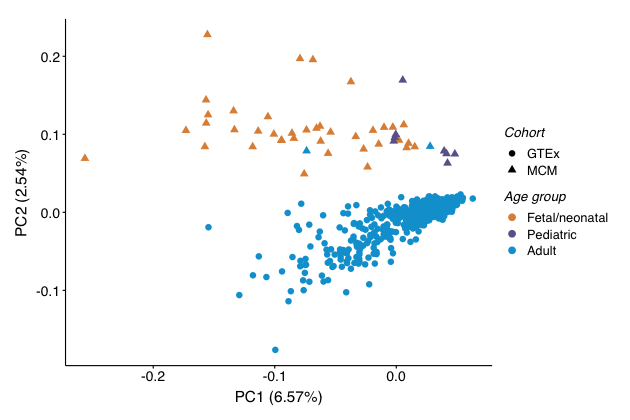

`geom_smooth()` using formula 'y ~ x'



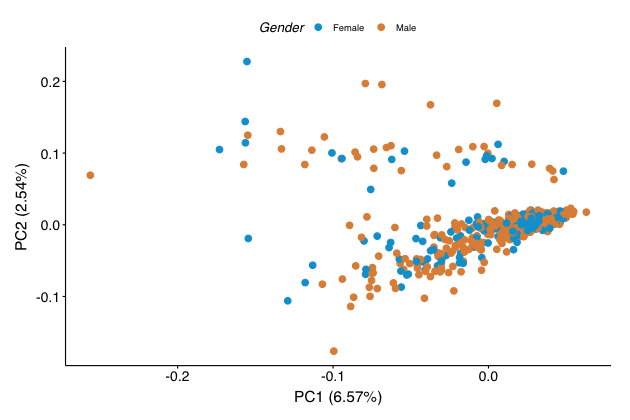

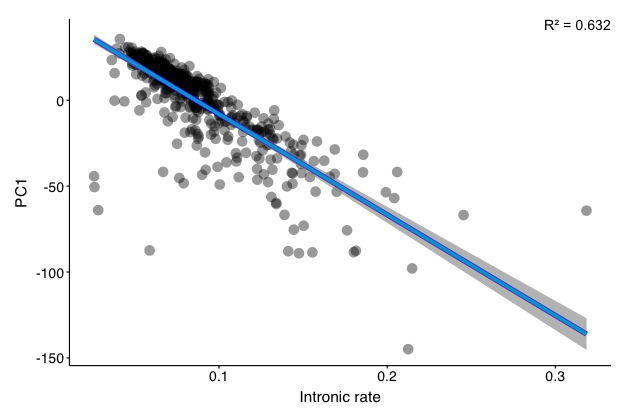

In [28]:
load("ori_data.TRUE.cardiac_muscle.RData")
# names(plots)[1:10]
options(repr.plot.width=base_width*1.5, repr.plot.height=base_width)

ori_data.TRUE.cardiac_muscle_age_group <- plots[["ori_data.TRUE.cardiac_muscle_age_group"]] + 
    pca_plot_theme() + 
    labs(colour = age_group_label, shape = cohort_label) +
    scale_color_manual(values = col_sz[3:1]) 

print(ori_data.TRUE.cardiac_muscle_age_group) 

ori_data.TRUE.cardiac_musclegender <- plots[["ori_data.TRUE.cardiac_musclegender"]] + 
    theme_Publication() + 
    theme(legend.key.size= unit(0.35, "cm")) +
    labs(colour = gender_label) +
    scale_color_manual(values = col_sz[c(1,3)])
print(ori_data.TRUE.cardiac_musclegender) 
r_squared <- calculate_r_squared(plots[["ori_data.TRUE.cardiac_muscle.Intronic.Rate.pc1"]])
ori_data.TRUE.cardiac_muscle.Intronic.Rate.pc1 <- plots[["ori_data.TRUE.cardiac_muscle.Intronic.Rate.pc1"]] + 
theme_Publication() + 
theme(legend.key.size= unit(0.35, "cm")) +
labs(x = "Intronic rate") +
geom_smooth(method = "lm", color = col_sz[1]) +
annotate("text", x = Inf, y = Inf, 
           label = paste("R² =", round(r_squared, 3)),
           hjust = 1, vjust = 1, size = 3)
print(ori_data.TRUE.cardiac_muscle.Intronic.Rate.pc1)


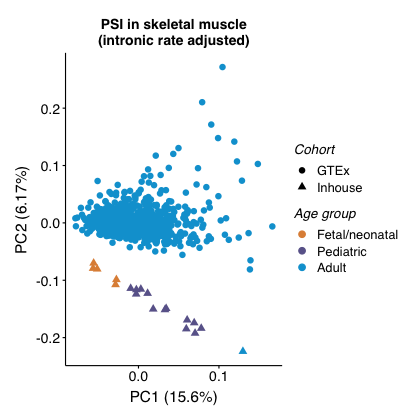

In [21]:
load("ori_data.FALSE.skeletal_muscle.RData")

options(repr.plot.width=base_width, repr.plot.height=base_width)

ori_data.FALSE.skeletal_muscle_age_group <- plots[["ori_data.FALSE.skeletal_muscle_age_group"]] + 
    pca_plot_theme() + 
    labs(colour = age_group_label, shape = cohort_label, title="PSI in skeletal muscle\n(intronic rate adjusted)") +
    scale_color_manual(values = col_sz[3:1]) 
print(ori_data.FALSE.skeletal_muscle_age_group) 

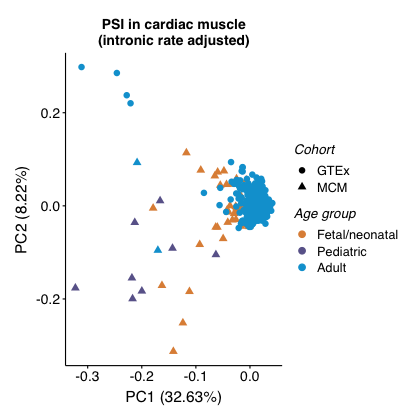

In [22]:
load("ori_data.FALSE.cardiac_muscle.RData")

options(repr.plot.width=base_width, repr.plot.height=base_width)

ori_data.FALSE.cardiac_muscle_age_group <- plots[["ori_data.FALSE.cardiac_muscle_age_group"]] + 
    pca_plot_theme() + 
    labs(colour = age_group_label, shape = cohort_label, title="PSI in cardiac muscle\n(intronic rate adjusted)") +
    scale_color_manual(values = col_sz[3:1]) 
print(ori_data.FALSE.cardiac_muscle_age_group) 

Warning message:
“Removed 90 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 90 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 90 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 90 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”


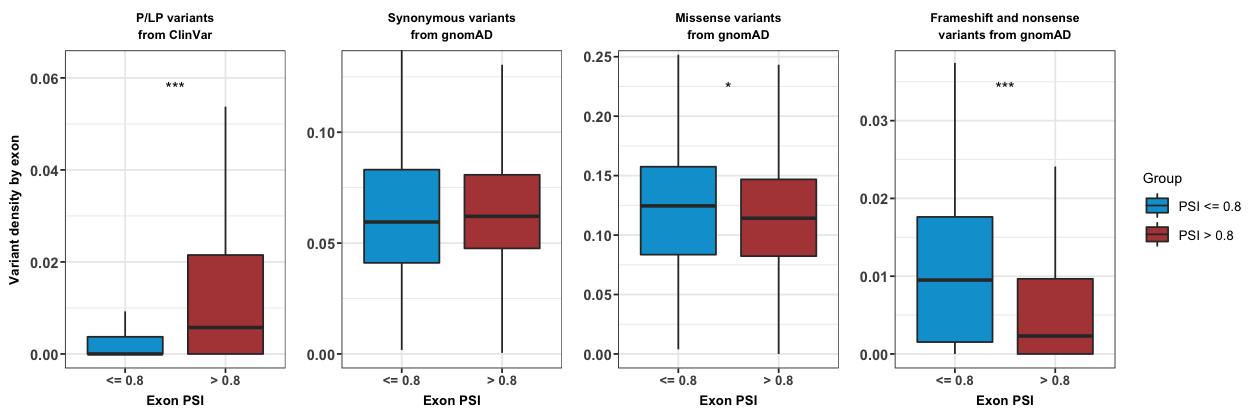

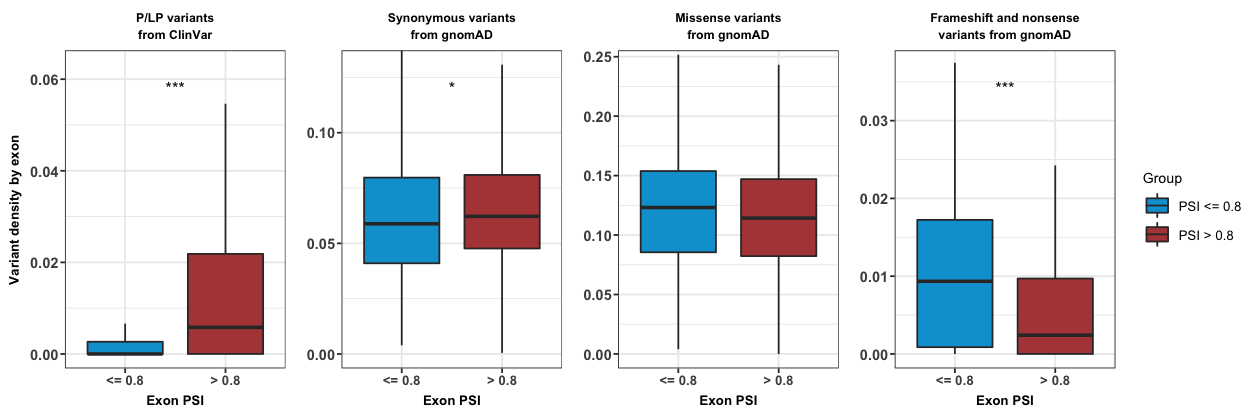

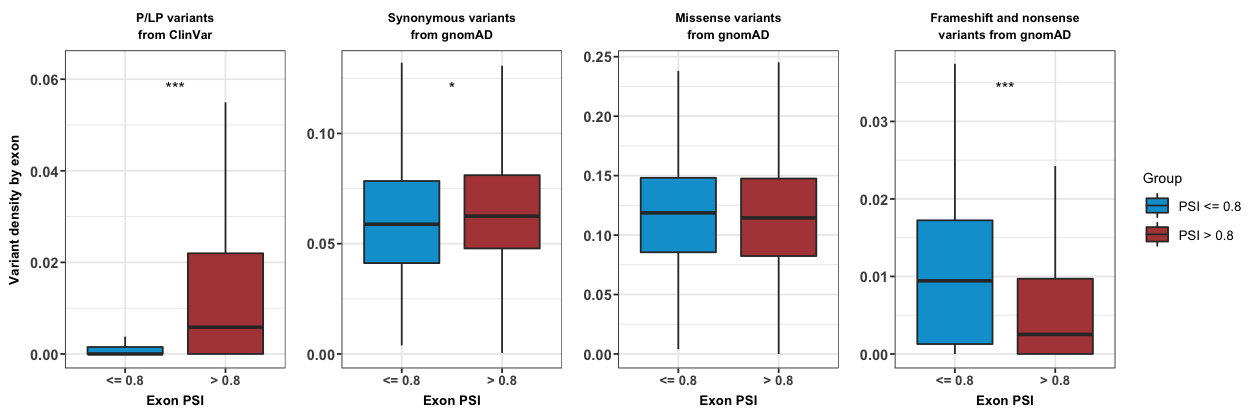

In [23]:
options(repr.plot.width=base_width*3, repr.plot.height=base_width)
load("boxplots_var_density_in_diff_psi.mean.fetal_neonatal.skeletal.RData")
combined_plots.mean.fetal_neonatal.skeletal <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.mean.fetal_neonatal.skeletal)


load("boxplots_var_density_in_diff_psi.mean.pediatric.skeletal.RData")
combined_plots.mean.pediatric.skeletal <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.mean.pediatric.skeletal)


load("boxplots_var_density_in_diff_psi.mean.adult.skeletal.RData")
combined_plots.mean.adult.skeletal <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.mean.adult.skeletal)


Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 530 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 530 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 530 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 530 rows containing non-finite values (stat_boxplot).”


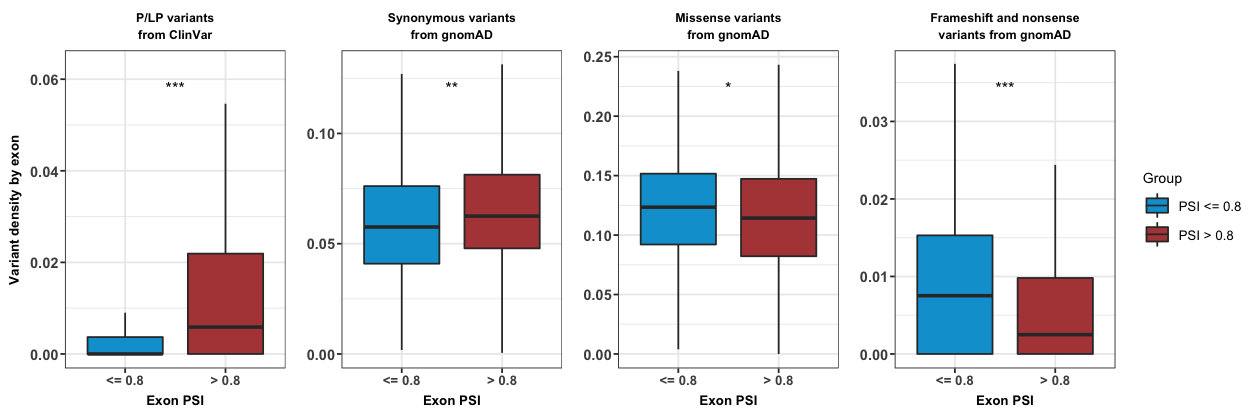

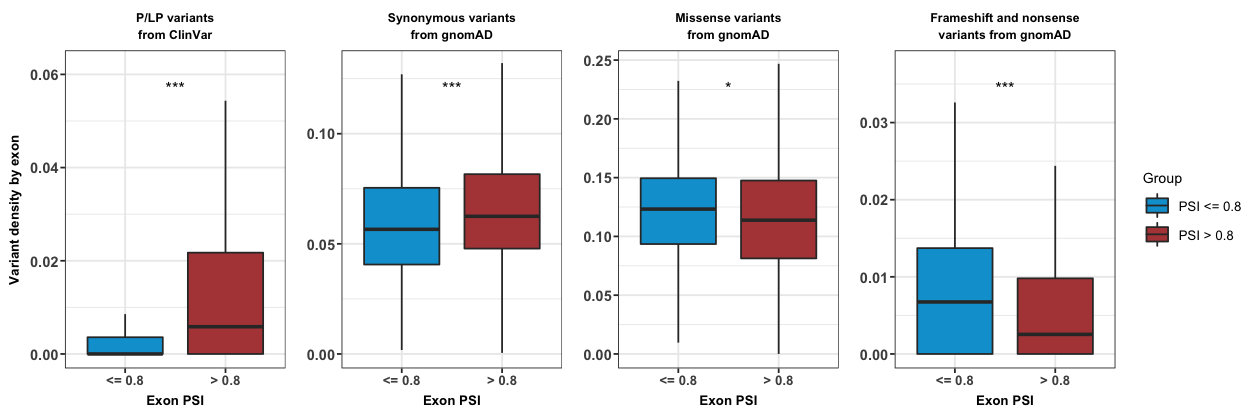

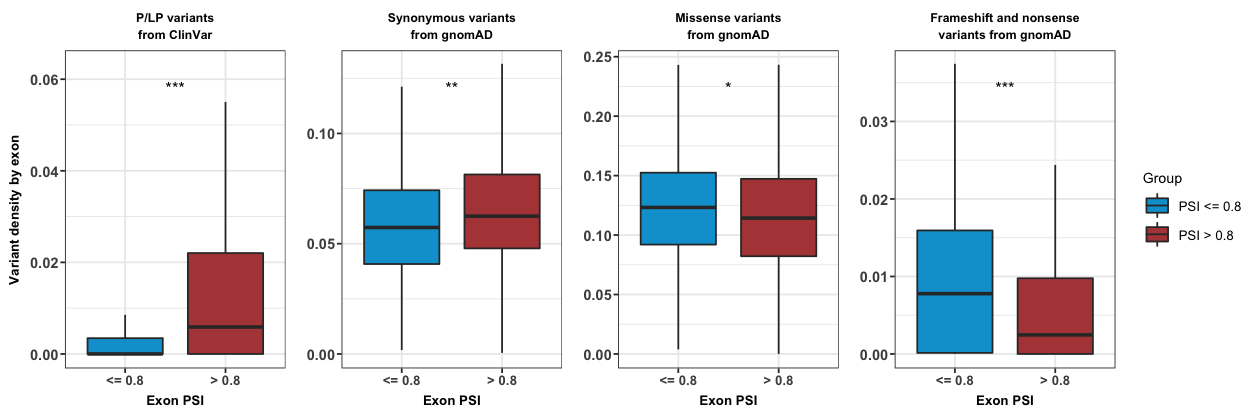

In [24]:
options(repr.plot.width=base_width*3, repr.plot.height=base_width)
load("boxplots_var_density_in_diff_psi.mean.fetal_neonatal.cardiac.RData")
combined_plots.mean.fetal_neonatal.cardiac <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.mean.fetal_neonatal.cardiac)


load("boxplots_var_density_in_diff_psi.mean.pediatric.cardiac.RData")
combined_plots.mean.pediatric.cardiac <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.mean.pediatric.cardiac)


load("boxplots_var_density_in_diff_psi.mean.adult.cardiac.RData")
combined_plots.mean.adult.cardiac <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.mean.adult.cardiac)

Warning message:
“Removed 252 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 252 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 252 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 252 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 138 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 138 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 138 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 138 rows containing non-finite values (stat_boxplot).”


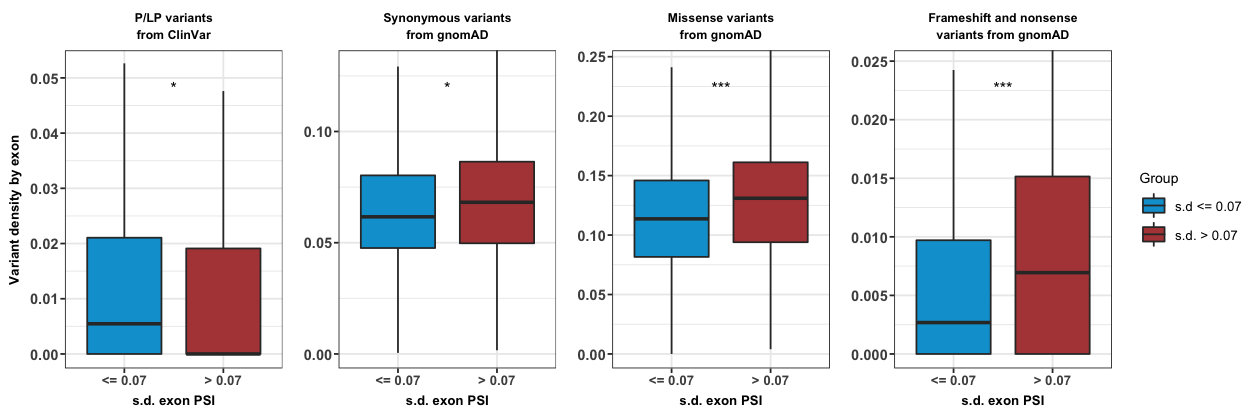

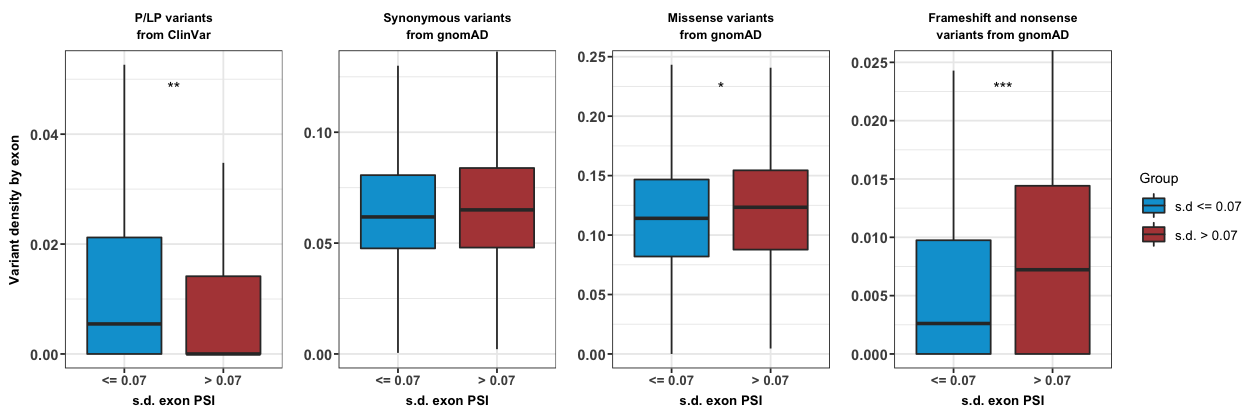

Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”


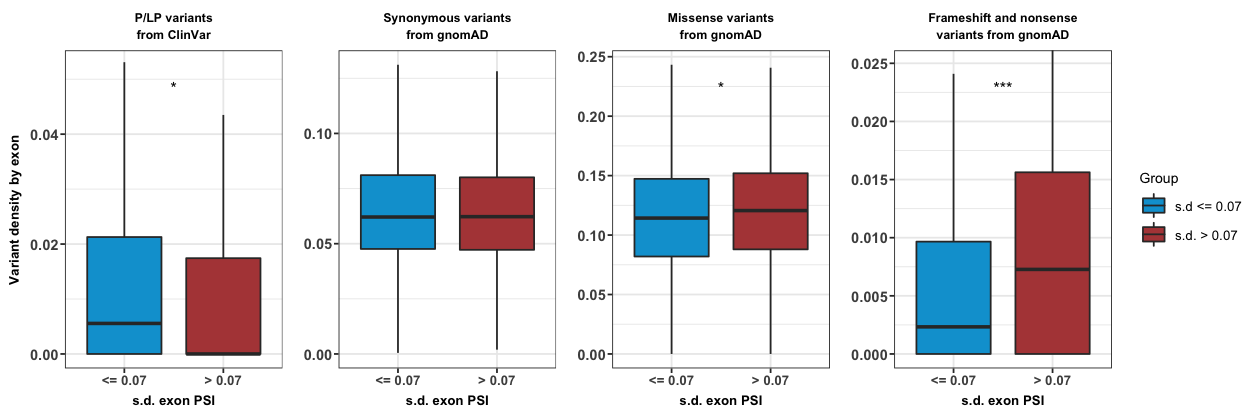

Warning message:
“Removed 764 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 764 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 764 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 764 rows containing non-finite values (stat_boxplot).”


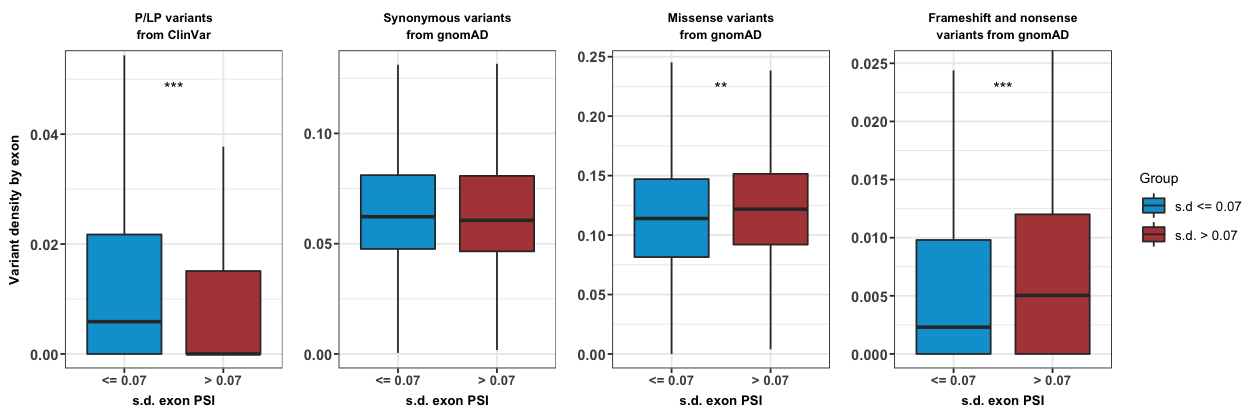

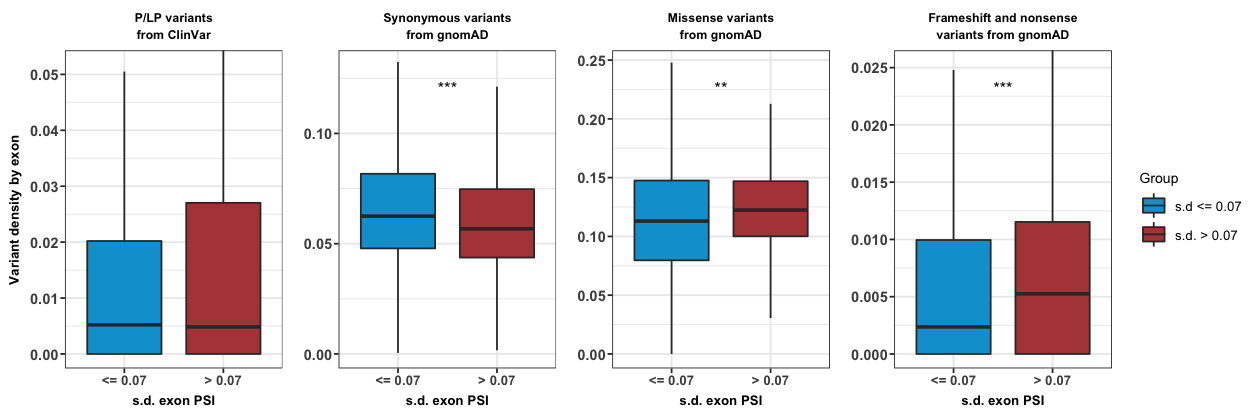

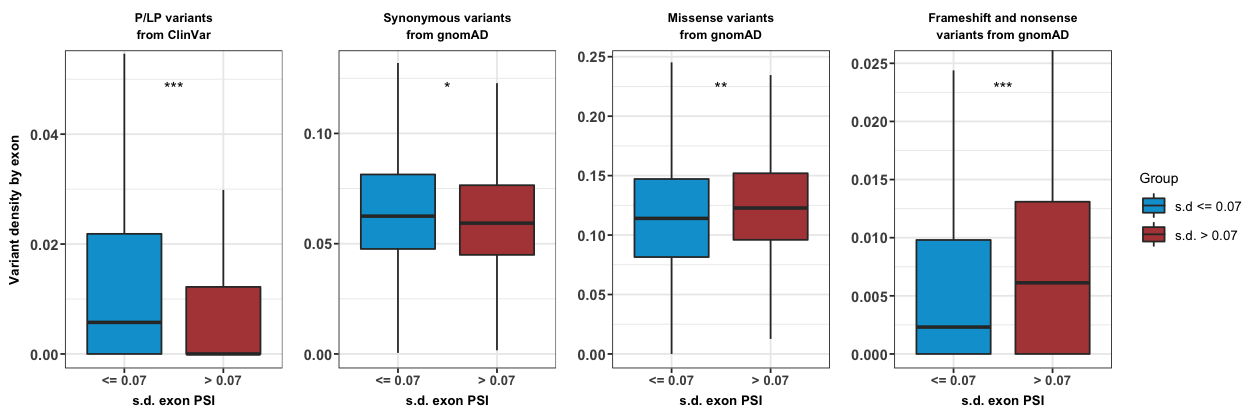

In [106]:
options(repr.plot.width=base_width*3, repr.plot.height=base_width)
load("boxplots_var_density_in_diff_psi.sd.fetal_neonatal.skeletal.RData")
combined_plots.sd.fetal_neonatal.skeletal <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.sd.fetal_neonatal.skeletal)


load("boxplots_var_density_in_diff_psi.sd.pediatric.skeletal.RData")
combined_plots.sd.pediatric.skeletal <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.sd.pediatric.skeletal)


load("boxplots_var_density_in_diff_psi.sd.adult.skeletal.RData")
combined_plots.sd.adult.skeletal <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.sd.adult.skeletal)

options(repr.plot.width=base_width*3, repr.plot.height=base_width)
load("boxplots_var_density_in_diff_psi.sd.fetal_neonatal.cardiac.RData")
combined_plots.sd.fetal_neonatal.cardiac <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.sd.fetal_neonatal.cardiac)


load("boxplots_var_density_in_diff_psi.sd.pediatric.cardiac.RData")
combined_plots.sd.pediatric.cardiac <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.sd.pediatric.cardiac)


load("boxplots_var_density_in_diff_psi.sd.adult.cardiac.RData")
combined_plots.sd.adult.cardiac <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] +
      plot_layout(ncol = 4, widths = c(1, 1, 1, 1), guides = "collect")
print(combined_plots.sd.adult.cardiac)

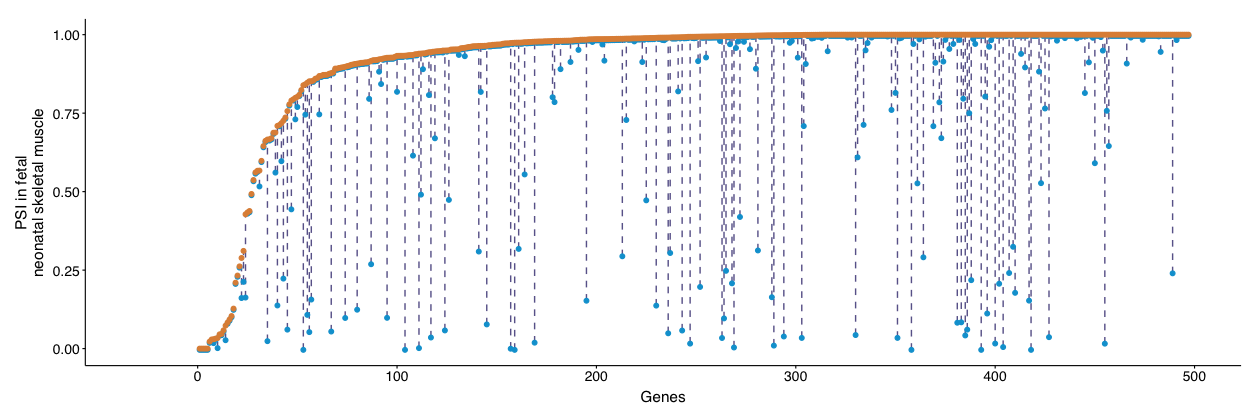

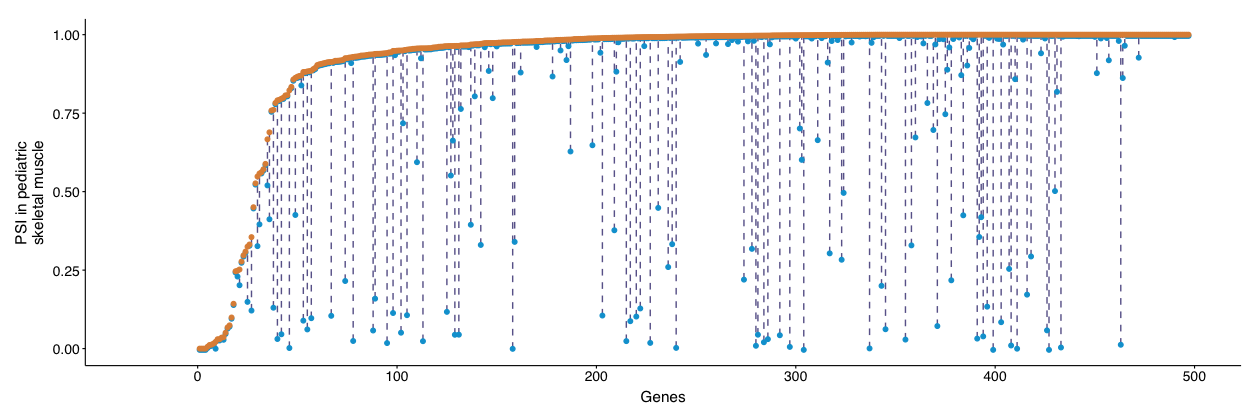

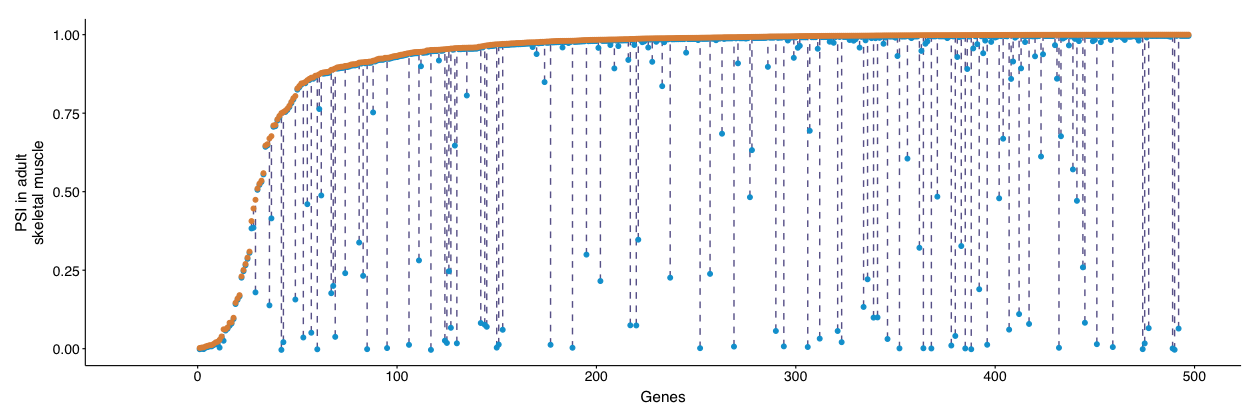

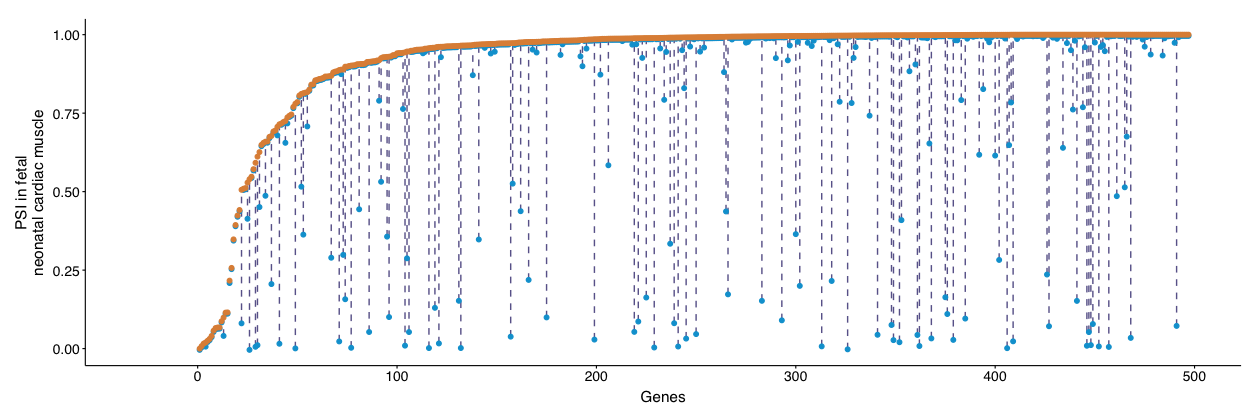

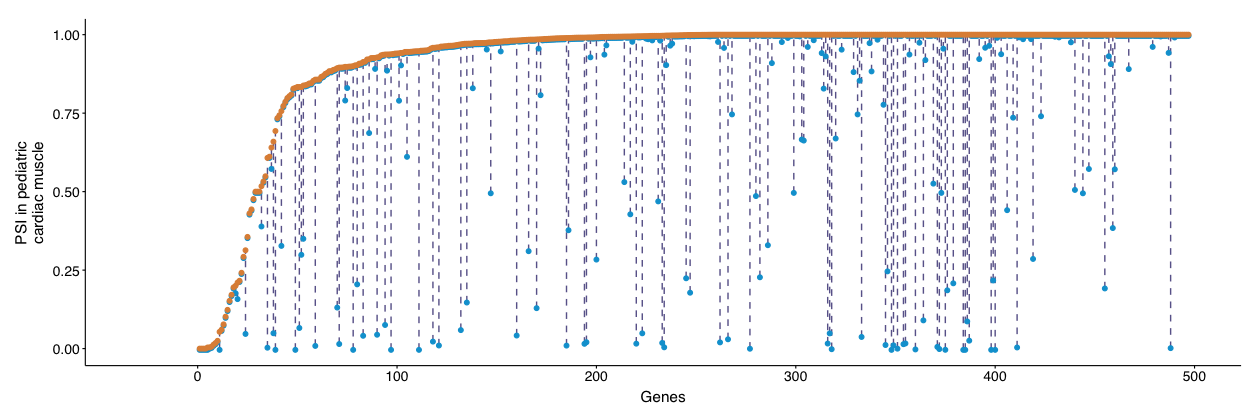

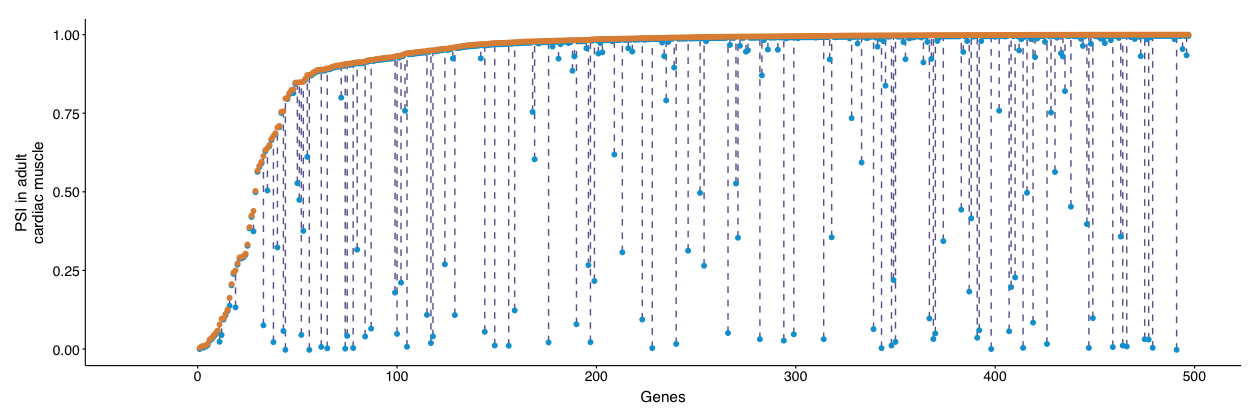

In [16]:
load("waterfall_graph.mean.fetal_neonatal.skeletal.RData")
waterfall_graph.mean.fetal_neonatal.skeletal <- waterfall_plot + theme_Publication() + labs(x="Genes", y="PSI in fetal\nneonatal skeletal muscle")
print(waterfall_graph.mean.fetal_neonatal.skeletal)
load("waterfall_graph.mean.pediatric.skeletal.RData")
waterfall_graph.mean.pediatric.skeletal <- waterfall_plot + theme_Publication() + labs(x="Genes", y="PSI in pediatric\nskeletal muscle")
print(waterfall_graph.mean.pediatric.skeletal)
load("waterfall_graph.mean.adult.skeletal.RData") 
waterfall_graph.mean.adult.skeletal <- waterfall_plot + theme_Publication() + labs(x="Genes", y="PSI in adult\nskeletal muscle")
print(waterfall_graph.mean.adult.skeletal)

load("waterfall_graph.mean.fetal_neonatal.cardiac.RData")
waterfall_graph.mean.fetal_neonatal.cardiac <- waterfall_plot + theme_Publication() + labs(x="Genes", y="PSI in fetal\nneonatal cardiac muscle")
print(waterfall_graph.mean.fetal_neonatal.cardiac)
load("waterfall_graph.mean.pediatric.cardiac.RData") 
waterfall_graph.mean.pediatric.cardiac <- waterfall_plot + theme_Publication() + labs(x="Genes", y="PSI in pediatric\ncardiac muscle")
print(waterfall_graph.mean.pediatric.cardiac)
load("waterfall_graph.mean.adult.cardiac.RData")
waterfall_graph.mean.adult.cardiac <- waterfall_plot + theme_Publication() + labs(x="Genes", y="PSI in adult\ncardiac muscle")
print(waterfall_graph.mean.adult.cardiac)


In [25]:
la <- "a"
lb <- "b"
lc <- "c"
ld <- "d"
le <- "e"
lf <- "f"
lg <- "g"
lh <- "h"
li <- "i"
lj <- "j"

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



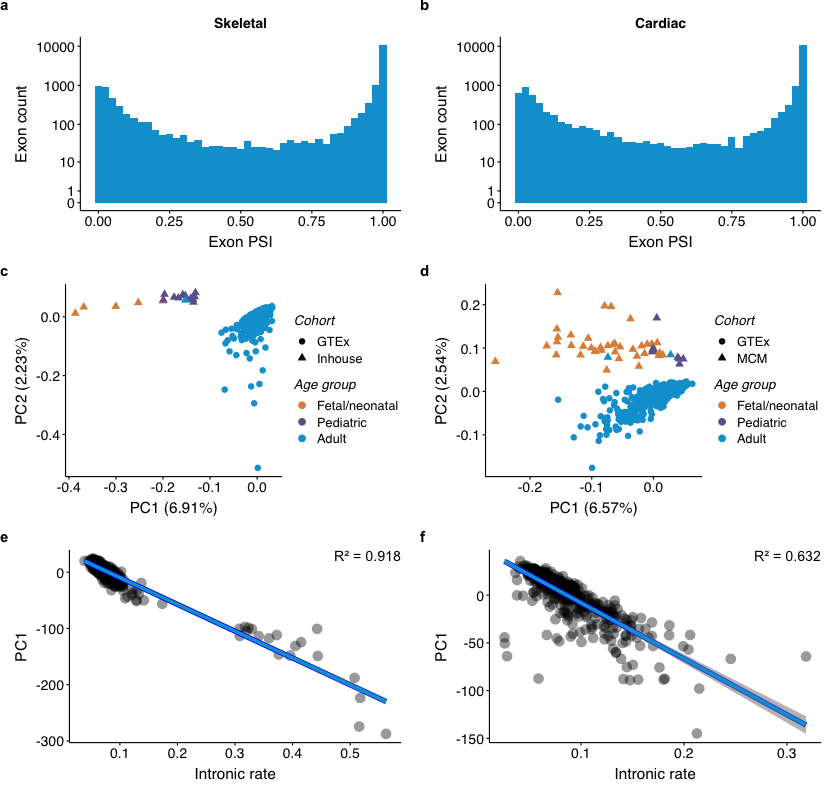

In [29]:
ww <- base_width*2
hh <- base_width*1.9
options(repr.plot.width=ww, repr.plot.height=hh)

p1 = skeletal_all_exon_psi_g
p2 = ori_data.TRUE.skeletal_muscle_age_group
p3 = ori_data.TRUE.skeletal_muscle.Intronic.Rate.pc1
p4 = cardiac_all_exon_psi_g
p5 = ori_data.TRUE.cardiac_muscle_age_group
p6 = ori_data.TRUE.cardiac_muscle.Intronic.Rate.pc1


layout_mat <- matrix(c(1,1,4,4,2,2,5,5,3,3,6,6), ncol = 4, byrow=T)

p1 = add_subfigure_label(p1, la)
p2 = add_subfigure_label(p2, lc)
p3 = add_subfigure_label(p3, le)
p4 = add_subfigure_label(p4, lb)
p5 = add_subfigure_label(p5, ld)
p6 = add_subfigure_label(p6, lf)

ge <- gridExtra::grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 2, layout_matrix = layout_mat)
ggsave("Figure1.pdf", ge, width = ww, height = hh)

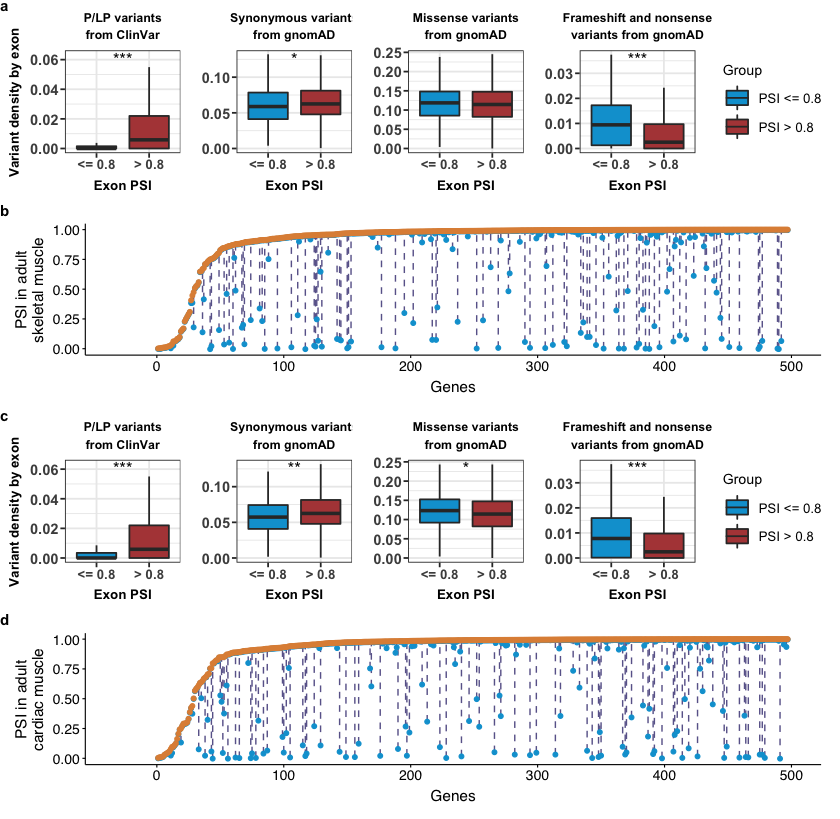

In [107]:
ww <- base_width*2
hh <- base_width*1.95
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- combined_plots.mean.adult.skeletal
p2 <- waterfall_graph.mean.adult.skeletal
p3 <- combined_plots.mean.adult.cardiac
p4 <- waterfall_graph.mean.adult.cardiac
layout_mat <- matrix(c(1,2,3,4), ncol = 1, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")
p3 = add_subfigure_label(p3, "c")
p4 = add_subfigure_label(p4, "d")

ge <- gridExtra::grid.arrange(p1, p2, p3, p4, ncol = 1, layout_matrix = layout_mat)
ggsave("Figure4.pdf", ge, width = ww, height = hh)


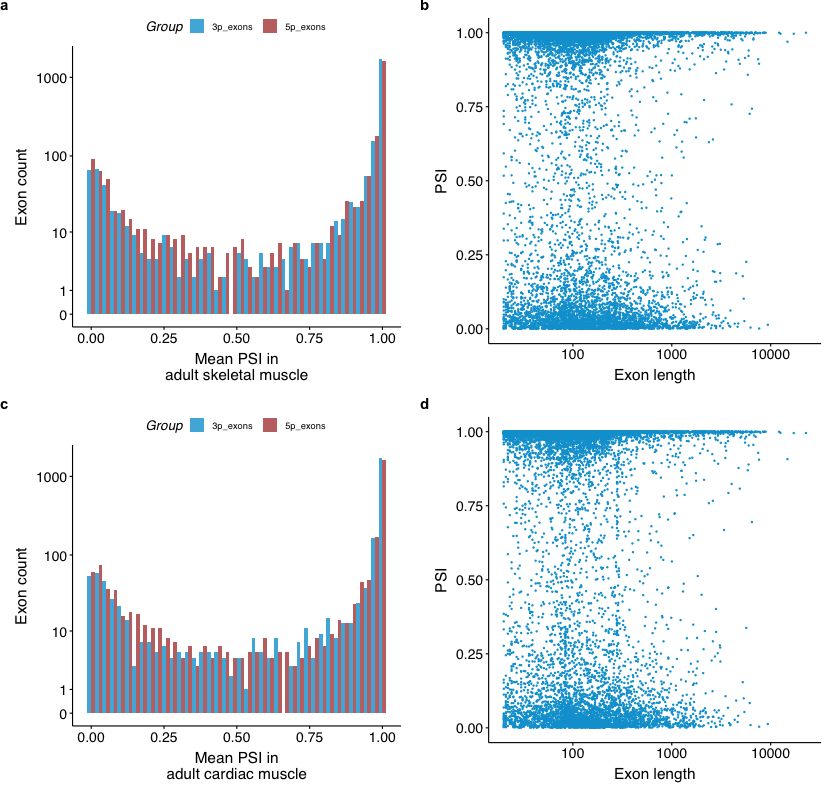

In [85]:
ww <- base_width*2
hh <- base_width*1.9
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- skeletal_exon_two_ends_g
p2 <- exon_len_psi_cor_g_skeletal
p3 <- cardiac_exon_two_ends_g
p4 <- exon_len_psi_cor_g_cardiac

layout_mat <- matrix(c(1,2,3,4), ncol = 2, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")
p3 = add_subfigure_label(p3, "c")
p4 = add_subfigure_label(p4, "d")

ge <- gridExtra::grid.arrange(p1, p2, p3, p4, ncol = 2, layout_matrix = layout_mat)
ggsave("FigureS2.pdf", ge, width = ww, height = hh)


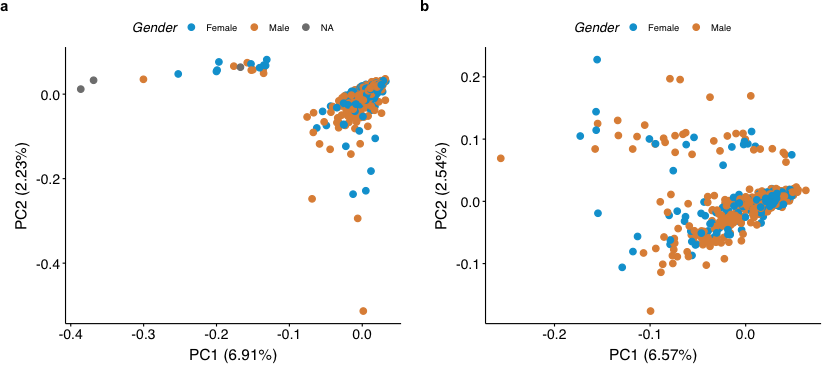

In [86]:
ww <- base_width*2
hh <- base_width*0.9
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- ori_data.TRUE.skeletal_musclegender
p2 <- ori_data.TRUE.cardiac_musclegender
layout_mat <- matrix(c(1,2), ncol = 2, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")


ge <- gridExtra::grid.arrange(p1, p2, ncol = 2, layout_matrix = layout_mat)
ggsave("FigureS3.pdf", ge, width = ww, height = hh)

Warning message:
“Removed 760733 rows containing non-finite values (stat_bin).”


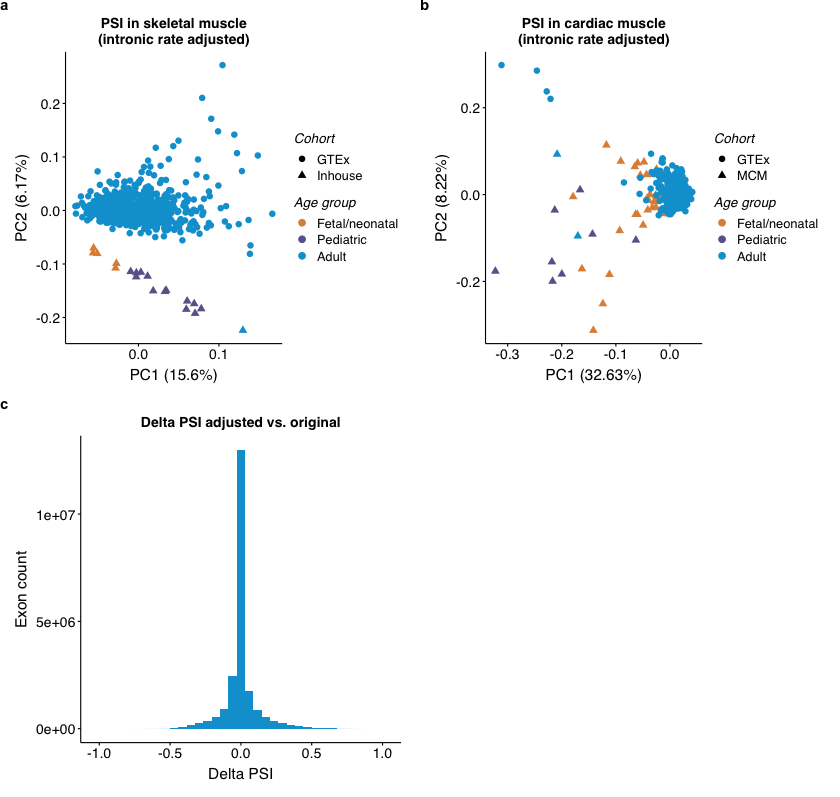

In [87]:


ww <- base_width*2
hh <- base_width*1.9
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- ori_data.FALSE.skeletal_muscle_age_group
p2 <- ori_data.FALSE.cardiac_muscle_age_group
p3 <- Delta_PSI_adjusted_vs_original

p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")
p3 = add_subfigure_label(p3, "c")



# Define the layout matrix for 2 rows and 2 columns
layout_mat <- matrix(c(1, 2,  # First row: p1 and p2
                       3, NA), # Second row: p3 in the first column, second column is blank
                      ncol = 2, byrow = TRUE)

# Arrange the plots
ge <- gridExtra::grid.arrange(p1, p2, p3, layout_matrix = layout_mat)

# Save the arranged plots to a file
ggsave("FigureS4.pdf", ge, width = ww, height = hh)



Warning message:
“Removed 90 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 90 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 90 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 90 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 530 rows conta

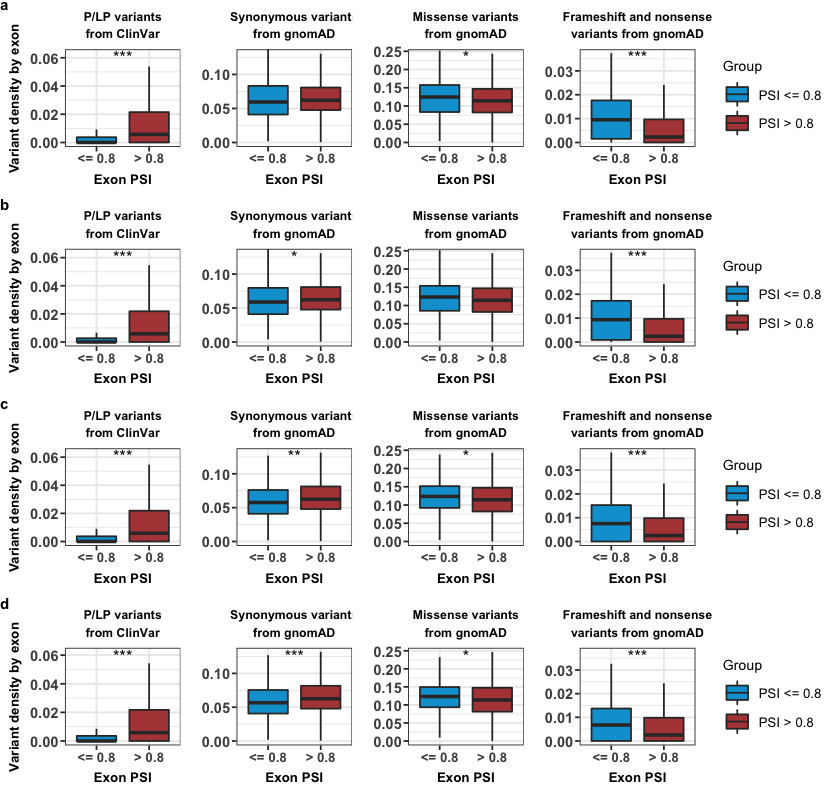

In [108]:

ww <- base_width*2
hh <- base_width*1.9
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- combined_plots.mean.fetal_neonatal.skeletal
p2 <- combined_plots.mean.pediatric.skeletal

p3 <- combined_plots.mean.fetal_neonatal.cardiac
p4 <- combined_plots.mean.pediatric.cardiac

layout_mat <- matrix(c(1,2,3,4), ncol = 1, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")
p3 = add_subfigure_label(p3, "c")
p4 = add_subfigure_label(p4, "d")

ge <- gridExtra::grid.arrange(p1, p2, p3, p4, ncol = 1, layout_matrix = layout_mat)
ggsave("FigureS9.pdf", ge, width = ww, height = hh)


Warning message:
“Removed 252 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 252 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 252 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 252 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 138 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 138 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 138 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 138 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 764 ro

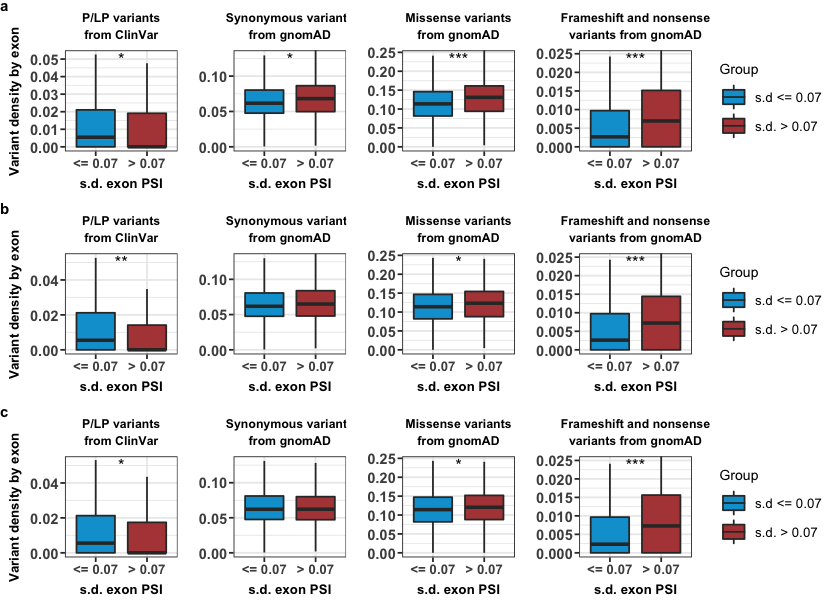

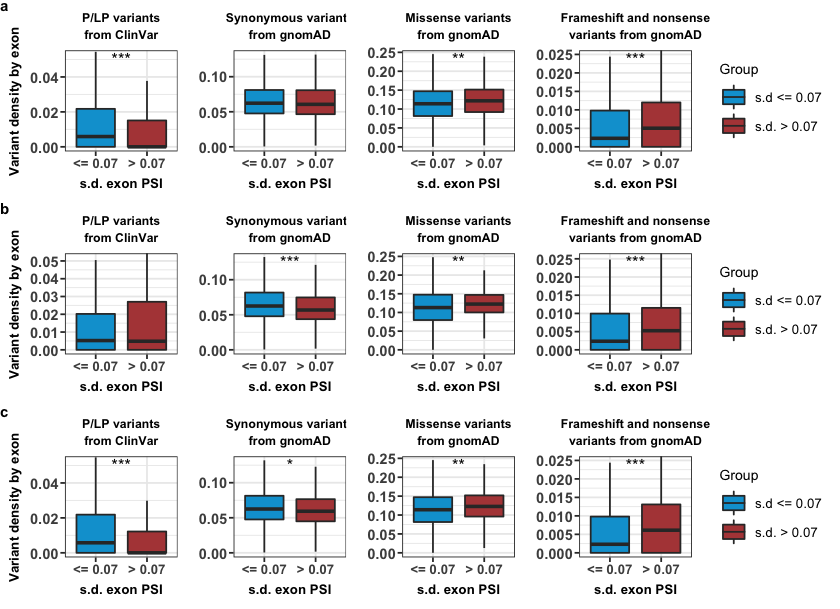

In [109]:
p1 <- combined_plots.sd.fetal_neonatal.skeletal
p2 <- combined_plots.sd.pediatric.skeletal
p3 <- combined_plots.sd.adult.skeletal
p4 <- combined_plots.sd.fetal_neonatal.cardiac
p5 <- combined_plots.sd.pediatric.cardiac
p6 <- combined_plots.sd.adult.cardiac


ww <- base_width*2
hh <- base_width*1.45
options(repr.plot.width=ww, repr.plot.height=hh)

layout_mat <- matrix(c(1,2,3), ncol = 1, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")
p3 = add_subfigure_label(p3, "c")
p4 = add_subfigure_label(p4, "a")
p5 = add_subfigure_label(p5, "b")
p6 = add_subfigure_label(p6, "c")

ge <- gridExtra::grid.arrange(p1, p2, p3, ncol = 1, layout_matrix = layout_mat)
ggsave("FigureS10.pdf", ge, width = ww, height = hh)

ge <- gridExtra::grid.arrange(p4, p5, p6, ncol = 1, layout_matrix = layout_mat)
ggsave("FigureS11.pdf", ge, width = ww, height = hh)


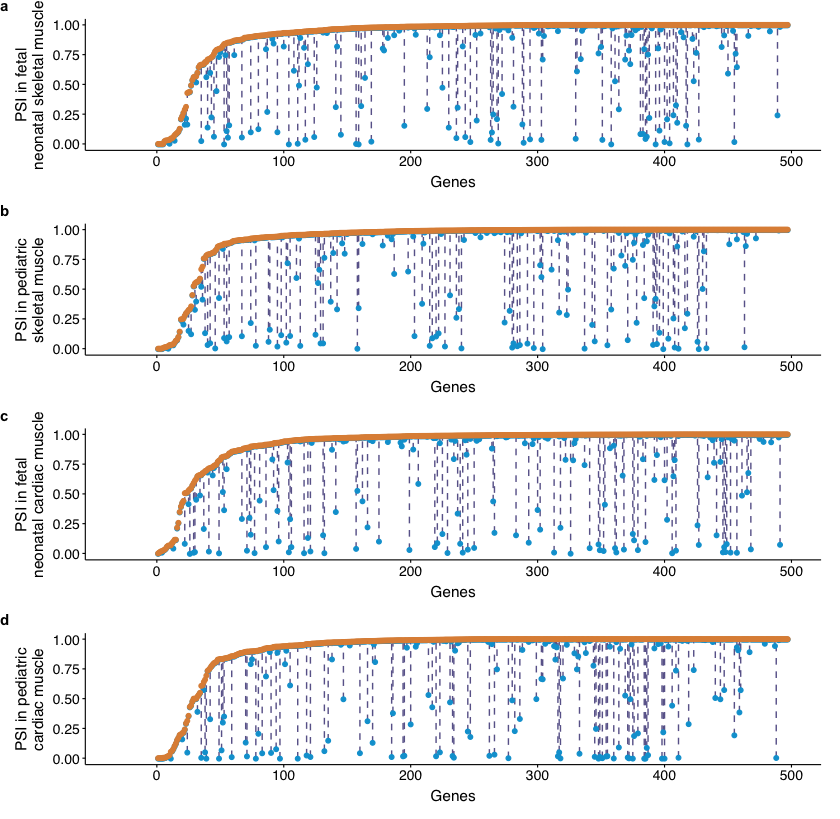

In [90]:

ww <- base_width*2
hh <- base_width*1.95
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- waterfall_graph.mean.fetal_neonatal.skeletal
p2 <- waterfall_graph.mean.pediatric.skeletal
p3 <- waterfall_graph.mean.fetal_neonatal.cardiac
p4 <- waterfall_graph.mean.pediatric.cardiac
layout_mat <- matrix(c(1,2,3,4), ncol = 1, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")
p3 = add_subfigure_label(p3, "c")
p4 = add_subfigure_label(p4, "d")

ge <- gridExtra::grid.arrange(p1, p2, p3, p4, ncol = 1, layout_matrix = layout_mat)
ggsave("FigureS12.pdf", ge, width = ww, height = hh)


In [91]:
# Function to wrap text after a certain width
wrap_text <- function(string, width = 22) {
  str_wrap(string, width = width)
}



plot_all_cols <- function(df, xlab, ylab, out_file, xlim_values) {
    # Melt the data
    df_long <- tidyr::pivot_longer(df, everything())

    # Ensure the order of factor levels for 'name' column matches the original column order
    df_long$name <- factor(df_long$name, levels = colnames(df))
    levels(df_long$name) <- get_new_name(levels(df_long$name))

    # Wrap text
    levels(df_long$name) <- sapply(levels(df_long$name), wrap_text)
    
    # Calculate the number of facets (panels)
    n_panels <- length(unique(df_long$name))
    nrow <- ceiling(n_panels / 3)  # Since you specified ncol = 3 for facet_wrap()
    
    # Determine figure dimensions
    row_height = base_width * 0.7 # or whatever height you prefer
    total_height = nrow * row_height
    total_width = base_width*9
    options(repr.plot.width=total_width, repr.plot.height=total_height)
    # Plot histograms using ggplot
    g <- ggplot(df_long, aes(x=value)) +
      geom_histogram(fill=col_sz[first_col_idx]) +
      facet_wrap(~ name, scales = "free", ncol = 3) +
      scale_x_continuous(limits = xlim_values) +
      theme_Publication(base_size=base_font_size-1) +
      theme(strip.text = element_text(size = 10, lineheight = 0.8)) +
      xlab(xlab) +
      ylab(ylab) +
        scale_y_continuous(trans = add_one_trans_obj,
                    breaks = hist_y_breaks, # custom breaks
                     labels = hist_y_breaks)
    
    # Save the plot to a file with specified dimensions
    ggsave(filename=out_file, plot=g, height=total_height, width=total_width)  # width is just an example

    return(g)
}

In [92]:
ANALYZE_ORIGINAL_DATA <- TRUE
load(file=paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/ori_data.", ANALYZE_ORIGINAL_DATA, ".age_tissue_subtype_dep.RData"))



In [93]:
get_new_name <- function(old_name){
    old_name <- gsub("mean_", "", old_name)
    old_name <- gsub("mean.", "", old_name)
    old_name <- gsub("sd_", "", old_name)
    old_name <- gsub("sd.", "", old_name)
    old_name <- gsub("delta_", "", old_name)
    old_name <- gsub("delta.", "", old_name)
    gsub("_|\\.", " ", old_name)
}

col_names_by_gene <- colnames(stat_by_gene)
mean_by_gene_idx <- grep("mean", col_names_by_gene)
age_diff_by_gene_idx <- grep("delta", col_names_by_gene)[1:6]
tissue_diff_by_gene_idx <- grep("delta", col_names_by_gene)[7:9]


col_names_by_exon <- colnames(skeletal_cardiac_stat_by_exon_cleaned)
mean_by_exon_idx <- grep("mean", col_names_by_exon)
sd_by_exon_idx <- grep("sd", col_names_by_exon)
age_diff_by_exon_idx <- grep("delta", col_names_by_exon)[1:6]
tissue_diff_by_exon_idx <- grep("delta", col_names_by_exon)[7:9]

In [42]:
library(e1071)
library(moments)

calculateSkewnessStats <- function(delta_psi_values) {
  # Calculate Skewness
  delta_psi_values <- na.omit(delta_psi_values)
  skewness_value <- skewness(delta_psi_values)

  # Calculate Standard Error of Skewness (SES) for large sample sizes
  n <- length(delta_psi_values)
  SES <- sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3)))

  # Calculate Z-score
  z_score <- skewness_value / SES

  # Determine the confidence level from the Z-score
  # Assuming a 95% confidence interval, critical Z value is approximately 1.96
  critical_value <- 1.96
  is_significant <- abs(z_score) > critical_value

  # Compile results into a list
  results <- list(
    skewness = skewness_value,
    SES = SES,
    z_score = z_score,
    is_significant = is_significant
  )
  
  return(results)
}
# head(skeletal_cardiac_stat_by_exon_cleaned[,age_diff_by_exon_idx])
m <- skeletal_cardiac_stat_by_exon_cleaned[,age_diff_by_exon_idx]
for( i in 1:dim(m)[2]){
   print(i)
    res <- calculateSkewnessStats(m[,i])
    print(res)
}

[1] 1
$skewness
[1] -0.2448983

$SES
[1] 0.01761539

$z_score
[1] -13.90252

$is_significant
[1] TRUE

[1] 2
$skewness
[1] -0.2249388

$SES
[1] 0.01754431

$z_score
[1] -12.82118

$is_significant
[1] TRUE

[1] 3
$skewness
[1] 0.2127414

$SES
[1] 0.01764004

$z_score
[1] 12.06014

$is_significant
[1] TRUE

[1] 4
$skewness
[1] -0.3486926

$SES
[1] 0.01749502

$z_score
[1] -19.93097

$is_significant
[1] TRUE

[1] 5
$skewness
[1] 1.172704

$SES
[1] 0.01777795

$z_score
[1] 65.96397

$is_significant
[1] TRUE

[1] 6
$skewness
[1] -1.670485

$SES
[1] 0.01777842

$z_score
[1] -93.96136

$is_significant
[1] TRUE



In [123]:


original_mean_by_gene <- plot_all_cols(stat_by_gene[,mean_by_gene_idx], "Mean PSI", "Gene count", "PSI_mean_by_gene.pdf", c(0, 1.06))
original_age_diff_by_gene <- plot_all_cols(stat_by_gene[,age_diff_by_gene_idx], "Delta PSI between age groups", "Gene count", "PSI_age_diff_by_gene.pdf", c(-1, 1))
original_tissue_diff_by_gene <- plot_all_cols(stat_by_gene[,tissue_diff_by_gene_idx], "Delta PSI between tissue subtypes", "Gene count", "PSI_tissue_diff_by_gene.pdf", c(-1, 1))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


In [124]:
original_mean_by_exon <- plot_all_cols(skeletal_cardiac_stat_by_exon_cleaned[,mean_by_exon_idx], "Mean PSI", "Exon count", "PSI_mean_by_exon.pdf", c(0, 1.06))
original_sd_by_exon <- plot_all_cols(skeletal_cardiac_stat_by_exon_cleaned[,sd_by_exon_idx], "s.d. PSI", "Exon count", "PSI_sd_by_exon.pdf", c(-0.06, 1.06))
original_age_diff_by_exon <- plot_all_cols(skeletal_cardiac_stat_by_exon_cleaned[,age_diff_by_exon_idx], "Delta PSI between age groups", "Exon count", "PSI_age_diff_by_exon.pdf", c(-1, 1))
original_tissue_diff_by_exon <- plot_all_cols(skeletal_cardiac_stat_by_exon_cleaned[,tissue_diff_by_exon_idx], "Delta PSI between tissue subtypes", "Exon count", "PSI_tissue_diff_by_exon.pdf", c(-1, 1))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1144 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2276 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2159 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1107 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2159 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1107 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


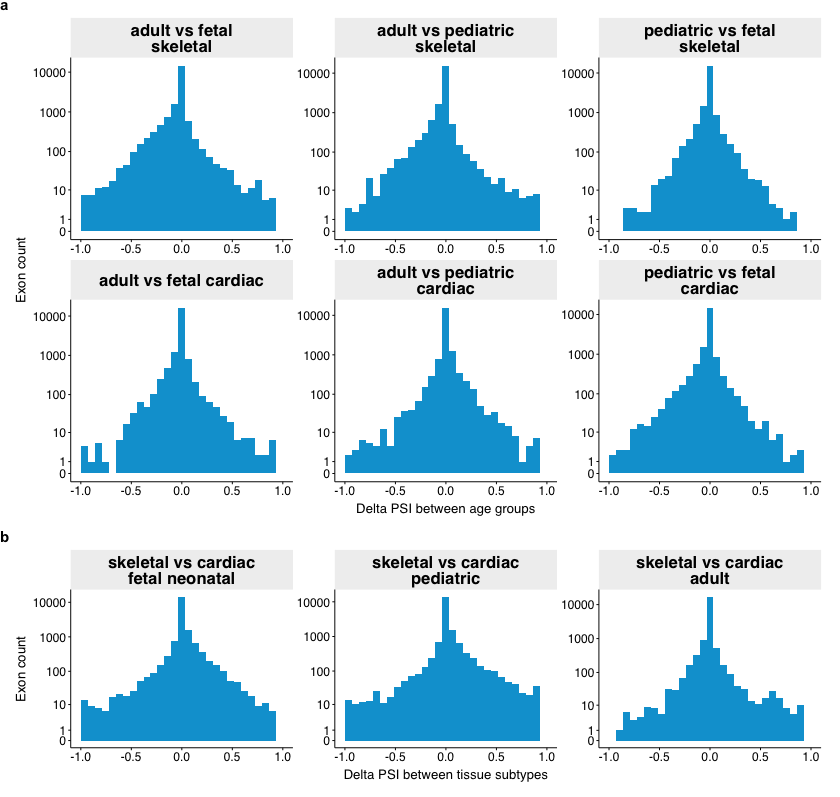

In [125]:
ww <- base_width*2
hh <- base_width*1.9
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- original_age_diff_by_exon
p2 <- original_tissue_diff_by_exon
layout_mat <- matrix(c(1,1,2), ncol = 1, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")


ge <- gridExtra::grid.arrange(p1, p2, ncol = 1, layout_matrix = layout_mat)
ggsave("Figure2.pdf", ge, width = ww, height = hh)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1144 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2276 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”


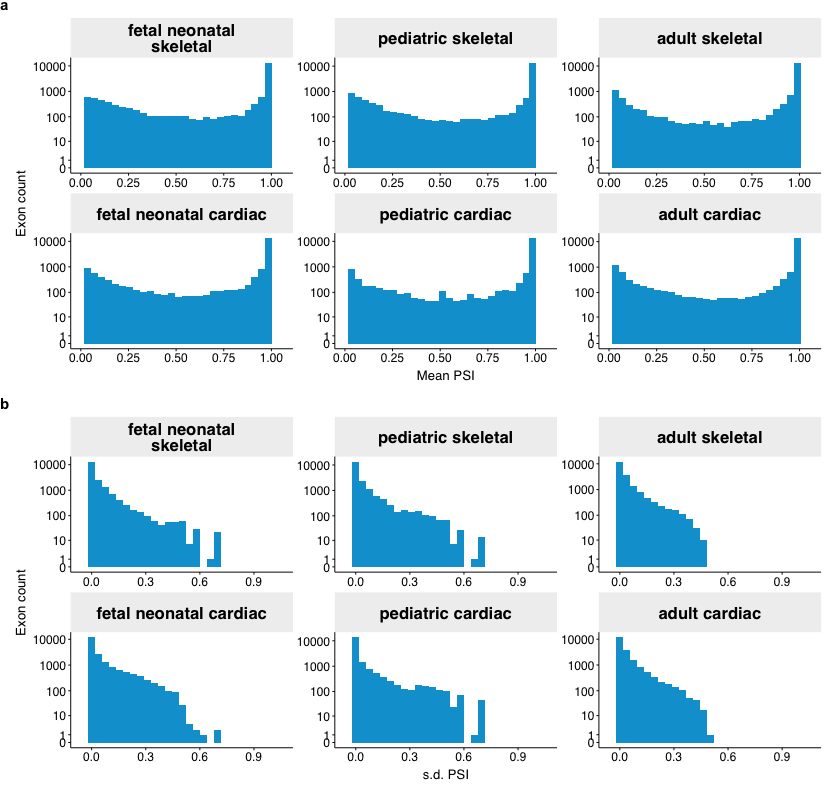

In [126]:
ww <- base_width*2
hh <- base_width*1.9
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- original_mean_by_exon
p2 <- original_sd_by_exon

layout_mat <- matrix(c(1,2), ncol = 1, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")


ge <- gridExtra::grid.arrange(p1, p2, layout_matrix = layout_mat)
ggsave("FigureS1.pdf", ge, width = ww, height = hh)



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


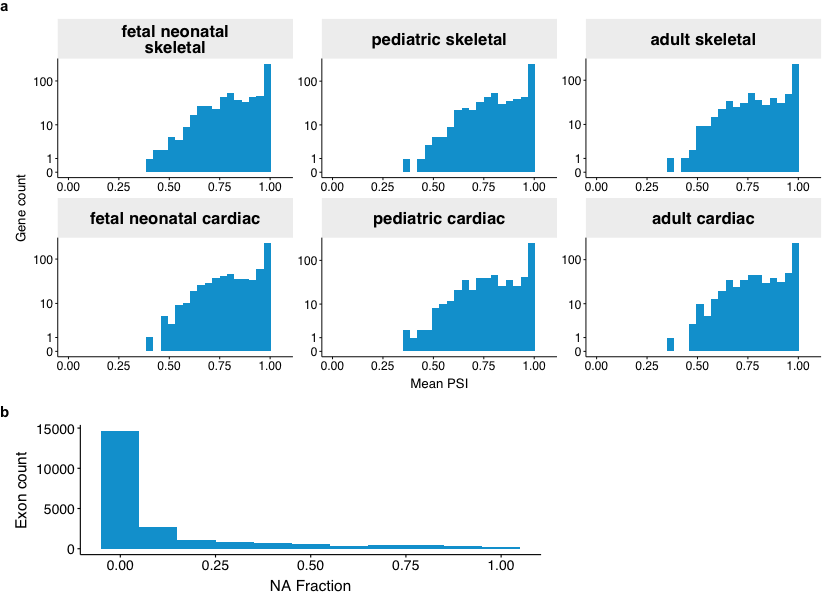

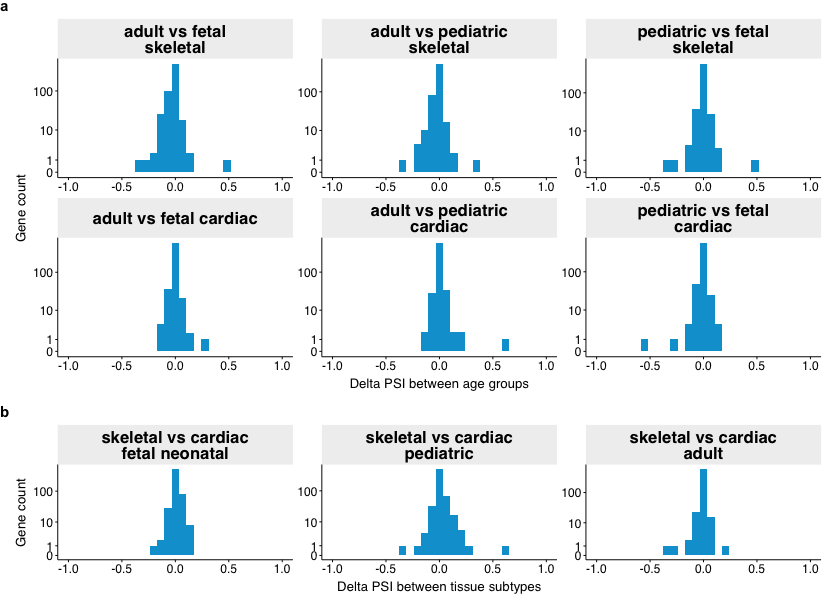

In [127]:


ww <- base_width*2
hh <- base_width*1.45
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- original_mean_by_gene 
p2 <- psi_NA_Fraction_by_gene

p3 <- original_age_diff_by_gene 
p4 <- original_tissue_diff_by_gene
layout_mat <- matrix(c(1,1,1,1,1,1,2,2,NA), ncol = 3, byrow=T)
p1 = add_subfigure_label(p1, la)
p2 = add_subfigure_label(p2, lb)
p3 = add_subfigure_label(p3, la)
p4 = add_subfigure_label(p4, lb)

ge <- gridExtra::grid.arrange(p1, p2, layout_matrix = layout_mat)
ggsave("FigureS1-2.pdf", ge, width = ww, height = hh)

layout_mat <- matrix(c(1,1,2), ncol = 1, byrow=T)
ge <- gridExtra::grid.arrange(p3, p4, layout_matrix = layout_mat)
ggsave("FigureS1-3.pdf", ge, width = ww, height = hh)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1144 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2159 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1107 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1144 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2159 rows containing non-finite

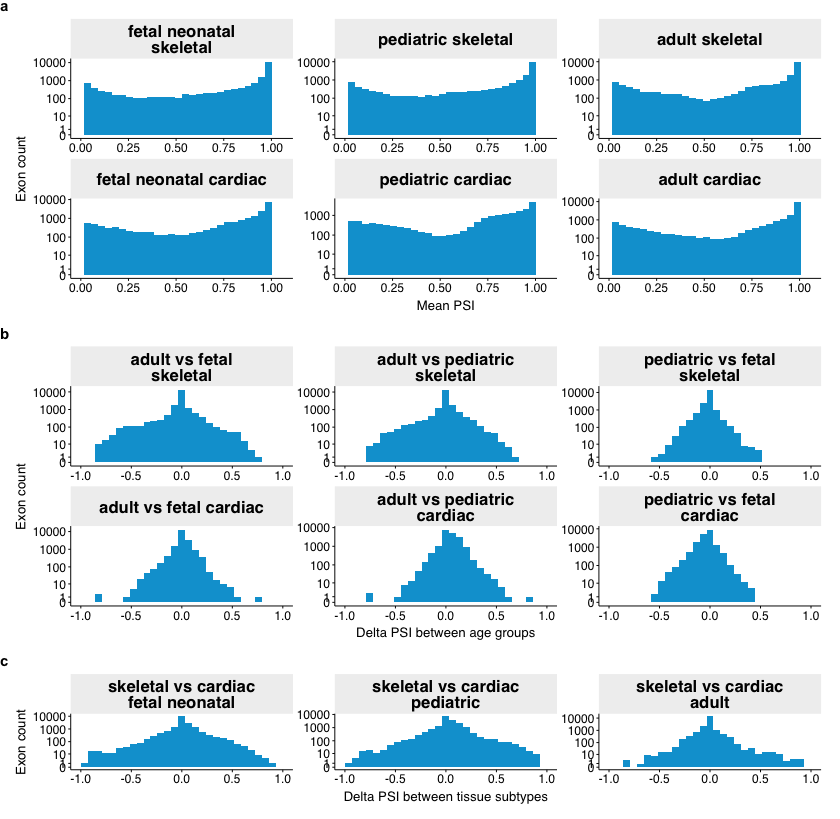

In [128]:
ANALYZE_ORIGINAL_DATA <- FALSE
load(file=paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/ori_data.", ANALYZE_ORIGINAL_DATA, ".age_tissue_subtype_dep.RData"))

ir_adjusted_mean_by_exon <- plot_all_cols(skeletal_cardiac_stat_by_exon_cleaned[,mean_by_exon_idx], "Mean PSI", "Exon count", "PSI_mean_by_exon.pdf", c(0, 1.06))
ir_adjusted_age_diff_by_exon <- plot_all_cols(skeletal_cardiac_stat_by_exon_cleaned[,age_diff_by_exon_idx], "Delta PSI between age groups", "Exon count", "PSI_age_diff_by_exon.pdf", c(-1, 1))
ir_adjusted_tissue_diff_by_exon <- plot_all_cols(skeletal_cardiac_stat_by_exon_cleaned[,tissue_diff_by_exon_idx], "Delta PSI between tissue subtypes", "Exon count", "PSI_tissue_diff_by_exon.pdf", c(-1, 1))

ww <- base_width*2
hh <- base_width*1.95
options(repr.plot.width=ww, repr.plot.height=hh)

p1 <- ir_adjusted_mean_by_exon 
p2 <- ir_adjusted_age_diff_by_exon 
p3 <- ir_adjusted_tissue_diff_by_exon
layout_mat <- matrix(c(1,1,2,2,3), ncol = 1, byrow=T)
p1 = add_subfigure_label(p1, "a")
p2 = add_subfigure_label(p2, "b")
p3 = add_subfigure_label(p3, "c")

ge <- gridExtra::grid.arrange(p1, p2, p3, ncol = 1, layout_matrix = layout_mat)
ggsave("FigureS1-4.pdf", ge, width = ww, height = hh)
